In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys
sys.path.append('../')

In [20]:
from aphasia.data.tabular import get_tabular_data
from aphasia.models.acgan import ACGAN
from aphasia.models.train import train_acgan, generate_from_acgan

from sklearn.preprocessing import label_binarize
import tensorflow as tf
import keras
import wandb
import numpy as np
import matplotlib.pyplot as plt

In [10]:
BATCH_SIZE = 4
N_CLASSES = 7
LATENT_DIM = 7
N_EPOCHS = 25

In [12]:
X, y = get_tabular_data('white', path_to_data='../datasets')
y = tf.convert_to_tensor(label_binarize(y, classes=list(range(N_CLASSES))), dtype=tf.float32)

dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(BATCH_SIZE)

In [16]:
model = ACGAN(X.shape[1], LATENT_DIM, N_CLASSES)
gen_opt = keras.optimizers.legacy.RMSprop()
dis_opt = keras.optimizers.legacy.RMSprop()

In [17]:
train_acgan(model, gen_opt, dis_opt, dataset, N_EPOCHS)

  0%|          | 0/98 [00:00<?, ?it/s]

  9%|▉         | 9/98 [00:00<00:03, 28.34it/s]

EPOCH 0. Loss: D=5.242369174957275, G=2.500140428543091


  8%|▊         | 8/98 [00:00<00:02, 30.84it/s]

EPOCH 1. Loss: D=4.982619762420654, G=2.5752925872802734


  8%|▊         | 8/98 [00:00<00:02, 30.91it/s]

EPOCH 2. Loss: D=4.995631217956543, G=2.5818333625793457


  8%|▊         | 8/98 [00:00<00:02, 30.78it/s]

EPOCH 3. Loss: D=5.065394401550293, G=2.571805953979492


  8%|▊         | 8/98 [00:00<00:02, 30.81it/s]

EPOCH 4. Loss: D=5.155057907104492, G=2.5048961639404297


  8%|▊         | 8/98 [00:00<00:02, 30.49it/s]

EPOCH 5. Loss: D=5.256931304931641, G=2.5814225673675537


  8%|▊         | 8/98 [00:00<00:02, 30.17it/s]

EPOCH 6. Loss: D=5.308345317840576, G=2.540541648864746


  8%|▊         | 8/98 [00:00<00:02, 30.81it/s]

EPOCH 7. Loss: D=5.362786293029785, G=2.542466402053833


  7%|▋         | 7/98 [00:00<00:02, 30.41it/s]

EPOCH 8. Loss: D=5.295381546020508, G=2.5266621112823486


  8%|▊         | 8/98 [00:00<00:02, 31.70it/s]

EPOCH 9. Loss: D=5.105389595031738, G=2.443068027496338


  8%|▊         | 8/98 [00:00<00:02, 31.48it/s]

EPOCH 10. Loss: D=4.954637050628662, G=2.308504343032837


  8%|▊         | 8/98 [00:00<00:02, 31.55it/s]

EPOCH 11. Loss: D=4.895901203155518, G=2.2744975090026855


  8%|▊         | 8/98 [00:00<00:02, 30.85it/s]

EPOCH 12. Loss: D=4.862809181213379, G=2.230384349822998


  7%|▋         | 7/98 [00:00<00:03, 30.16it/s]

EPOCH 13. Loss: D=4.69838809967041, G=2.082599639892578


  7%|▋         | 7/98 [00:00<00:02, 30.43it/s]

EPOCH 14. Loss: D=4.580257415771484, G=2.061161518096924


  8%|▊         | 8/98 [00:00<00:02, 30.69it/s]

EPOCH 15. Loss: D=4.521069526672363, G=1.959747552871704


  7%|▋         | 7/98 [00:00<00:02, 30.50it/s]

EPOCH 16. Loss: D=4.720518112182617, G=2.111922025680542


  7%|▋         | 7/98 [00:00<00:03, 29.62it/s]

EPOCH 17. Loss: D=4.494129657745361, G=1.8784747123718262


  8%|▊         | 8/98 [00:00<00:02, 30.86it/s]

EPOCH 18. Loss: D=4.5153656005859375, G=1.8712513446807861


  7%|▋         | 7/98 [00:00<00:02, 30.43it/s]

EPOCH 19. Loss: D=4.6571044921875, G=1.881865382194519


  7%|▋         | 7/98 [00:00<00:02, 30.50it/s]

EPOCH 20. Loss: D=4.5339202880859375, G=1.8656516075134277


  8%|▊         | 8/98 [00:00<00:02, 30.51it/s]

EPOCH 21. Loss: D=4.462920188903809, G=1.8656574487686157


  7%|▋         | 7/98 [00:00<00:02, 30.56it/s]

EPOCH 22. Loss: D=4.471231460571289, G=1.8710989952087402


  7%|▋         | 7/98 [00:00<00:02, 30.47it/s]

EPOCH 23. Loss: D=4.460213661193848, G=1.8746410608291626


  7%|▋         | 7/98 [00:00<00:02, 30.46it/s]

EPOCH 24. Loss: D=4.5167436599731445, G=1.8770737648010254


100%|██████████| 98/98 [00:03<00:00, 30.77it/s]


In [19]:
test_model = keras.models.clone_model(model)

In [33]:
X, y = get_tabular_data('white', path_to_data='../datasets')

unique, counts = np.unique(y, return_counts=True)
y_val = dict(zip(unique, counts))
for c, count in y_val.items():
    X = np.append(X, generate_from_acgan(model, 150 - count, c, N_CLASSES), axis=0)
    y = np.append(y, np.ones(150 - count) * c, axis=0)

In [34]:
from aphasia.models.tab_search import search_cv, cross_validate
from aphasia.common.utils import make_cm

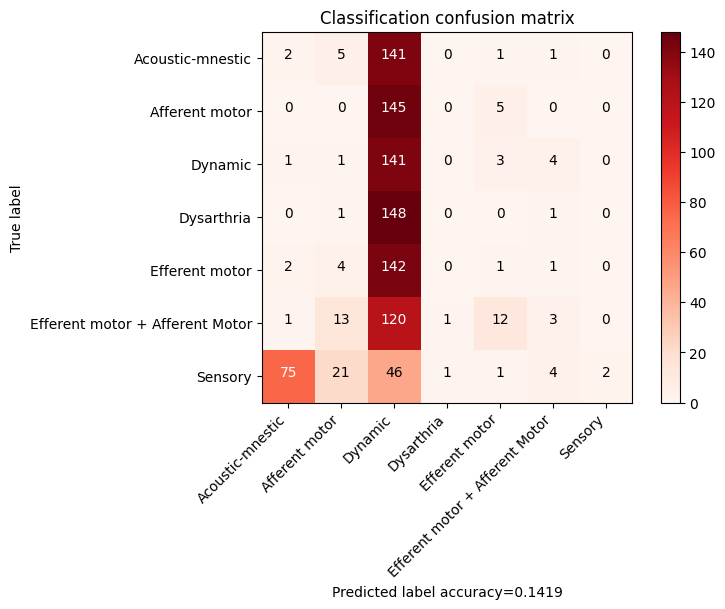

In [36]:
fake_logits, aux_logits = test_model.discriminate(X)
predictions = np.argmax(aux_logits, axis=1)
make_cm([(y, predictions)])